In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [3]:
# Read config.yaml
with open('../configs/config_malanville.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [4]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head()

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,Moving_Sum_6,SPI6
0,31/1/1981,98.44,21.82,36.88,58.88,2.51,0.52,NaN,NaN,0.00,NaN,NaN,NaN
1,28/2/1981,98.24,26.02,27.56,74.25,2.52,0.49,NaN,NaN,0.00,NaN,NaN,NaN
2,31/3/1981,98.13,30.23,35.12,107.25,2.09,0.47,NaN,NaN,5.27,NaN,NaN,NaN
3,30/4/1981,98.03,31.19,48.62,208.50,2.63,0.46,NaN,NaN,31.64,NaN,NaN,NaN
4,31/5/1981,98.21,28.87,68.56,229.12,2.53,0.48,NaN,NaN,73.83,NaN,NaN,NaN


In [5]:
dataset_path

'../datasets/raw/Malanville_with_SPI6.csv'

In [6]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,Moving_Sum_6,SPI6
DATE,,,,,,,,,,,,
1981-01-31,98.44,21.82,36.88,58.88,2.51,0.52,NaN,NaN,0.00,NaN,NaN,NaN
1981-02-28,98.24,26.02,27.56,74.25,2.52,0.49,NaN,NaN,0.00,NaN,NaN,NaN
1981-03-31,98.13,30.23,35.12,107.25,2.09,0.47,NaN,NaN,5.27,NaN,NaN,NaN
1981-04-30,98.03,31.19,48.62,208.50,2.63,0.46,NaN,NaN,31.64,NaN,NaN,NaN
1981-05-31,98.21,28.87,68.56,229.12,2.53,0.48,NaN,NaN,73.83,NaN,NaN,NaN


In [7]:
# Delete the 'Moving_Sum_6' column (it is not a variable but just serve to compute SPI6)
data = data.drop(columns='Moving_Sum_6', axis=1)
data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.44,21.82,36.88,58.88,2.51,0.52,NaN,NaN,0.00,NaN,NaN
1981-02-28,98.24,26.02,27.56,74.25,2.52,0.49,NaN,NaN,0.00,NaN,NaN
1981-03-31,98.13,30.23,35.12,107.25,2.09,0.47,NaN,NaN,5.27,NaN,NaN
1981-04-30,98.03,31.19,48.62,208.50,2.63,0.46,NaN,NaN,31.64,NaN,NaN
1981-05-31,98.21,28.87,68.56,229.12,2.53,0.48,NaN,NaN,73.83,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,98.43,25.87,84.56,225.75,1.56,0.54,79.40,37.45,265.57,17.32,0.591896
2021-09-30,98.41,26.28,82.69,201.69,1.36,0.61,63.72,36.71,170.59,18.96,1.197748
2021-10-31,98.29,27.87,69.75,126.12,1.38,0.59,39.91,34.57,28.64,22.29,1.283649


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [9]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,98.284329,27.777337,52.556504,153.849451,2.208211,0.493557,48.398377,35.247215,64.256260,20.241623,1.313118e-16
std,0.151421,2.743441,22.221711,69.879734,0.504959,0.053296,20.170750,2.661185,80.280464,1.587112,1.000000e+00
min,97.820000,21.060000,13.810000,12.810000,1.260000,0.430000,5.240000,30.230000,0.000000,15.650000,-1.421025e+00
25%,98.180000,25.980000,32.310000,74.747500,1.787500,0.450000,29.790000,33.455000,0.000000,19.197500,-9.765310e-01
50%,98.320000,27.095000,52.970000,194.500000,2.240000,0.480000,53.590000,36.680000,21.090000,20.345000,2.840874e-02
75%,98.390000,29.670000,74.265000,216.765000,2.580000,0.520000,65.235000,37.357500,121.290000,21.362500,8.729437e-01
max,98.750000,34.550000,85.880000,319.690000,3.590000,0.700000,81.950000,37.880000,321.680000,24.480000,2.134890e+00


In [10]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [11]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset

In [12]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.44,21.82,36.88,58.88,2.51,0.52,NaN,NaN,0.00,NaN,NaN
1981-02-28,98.24,26.02,27.56,74.25,2.52,0.49,NaN,NaN,0.00,NaN,NaN
1981-03-31,98.13,30.23,35.12,107.25,2.09,0.47,NaN,NaN,5.27,NaN,NaN
1981-04-30,98.03,31.19,48.62,208.50,2.63,0.46,NaN,NaN,31.64,NaN,NaN
1981-05-31,98.21,28.87,68.56,229.12,2.53,0.48,NaN,NaN,73.83,NaN,NaN
1981-06-30,98.36,28.59,69.31,217.62,2.47,0.49,NaN,NaN,200.39,NaN,-0.280820
1981-07-31,98.41,25.82,81.75,228.56,2.12,0.58,NaN,NaN,242.58,NaN,0.608168


In [13]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


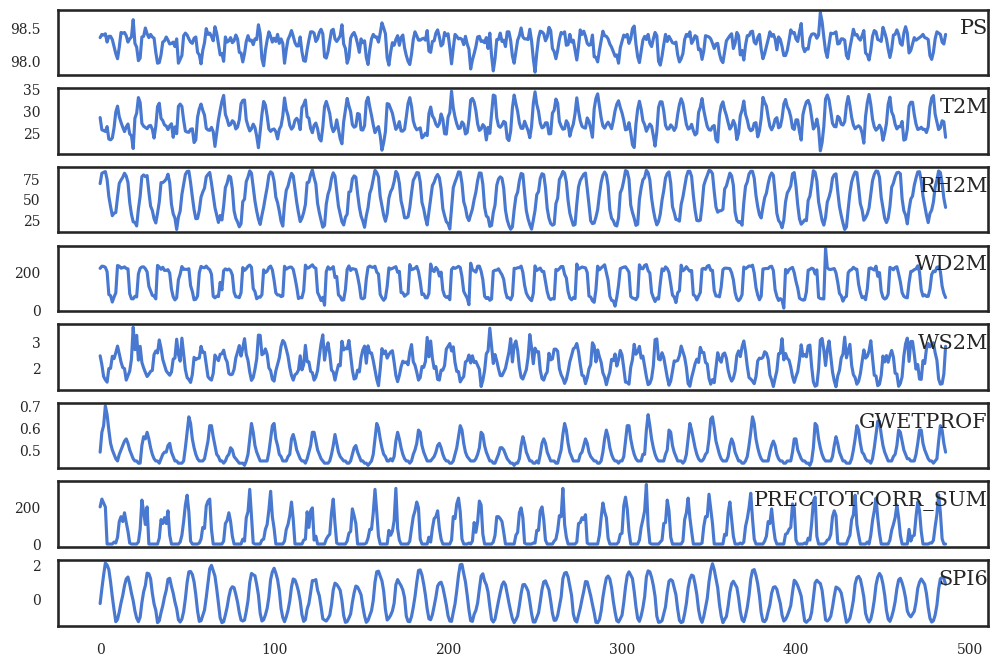

In [15]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [16]:
target_column = 'SPI6'

In [17]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=[target_column])
target = data[target_column]

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.161290,0.116383,0.540169,0.334789,0.038627,-0.555556,0.245897,-0.280820
1981-07-31,0.268817,-0.294292,0.885389,0.406087,-0.261803,0.111111,0.508207,0.608168
1981-08-31,0.247312,-0.319496,0.918413,0.401655,-0.656652,0.333333,0.377021,1.419830
1981-09-30,0.290323,-0.349148,0.942556,0.366984,-0.768240,1.000000,0.245897,2.134890
1981-10-31,0.010753,-0.186064,0.678923,0.223605,-0.845494,0.703704,-1.000000,2.018939


### Pearson Correlation

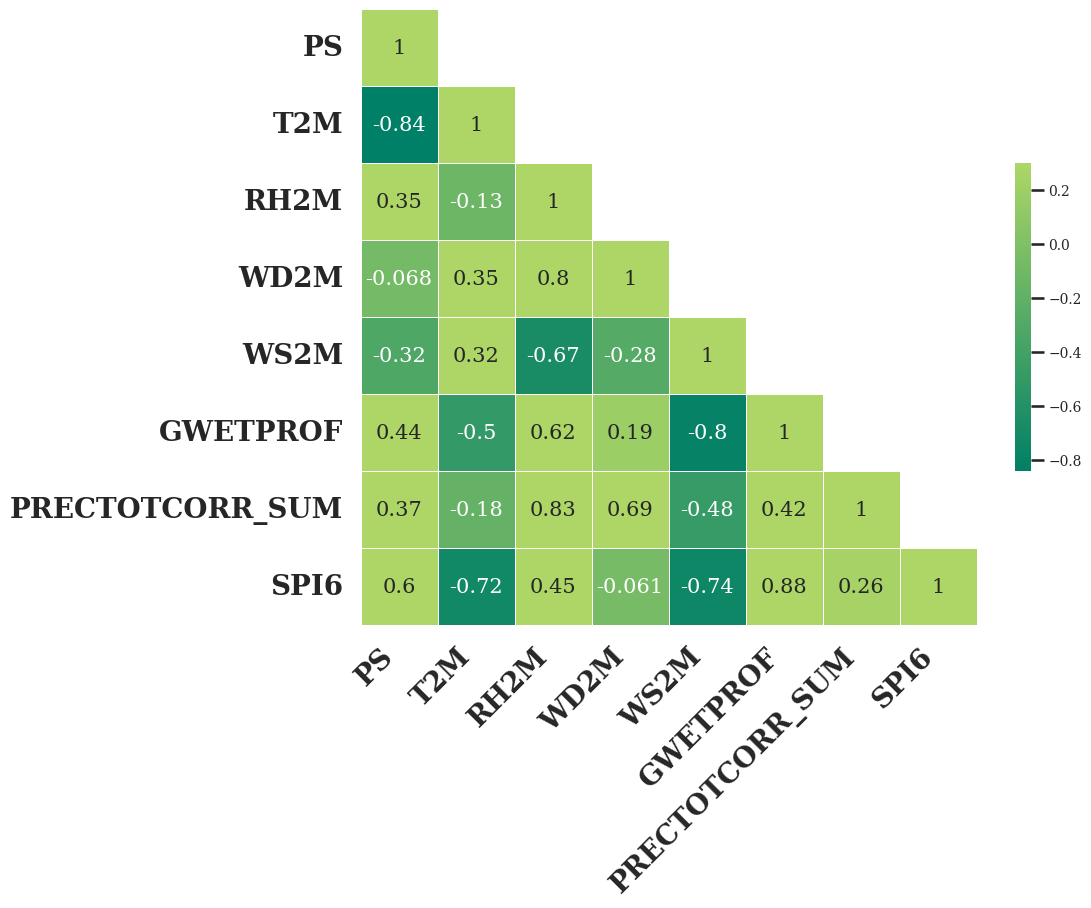

In [18]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
plt.savefig('heatmap correlation Pix1')

#### Let's focus on the corelations between each variable and target variable

In [19]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.877363
PS                 0.599850
RH2M               0.447300
PRECTOTCORR_SUM    0.255743
WD2M              -0.060814
T2M               -0.723863
WS2M              -0.741225
Name: SPI6, dtype: float64

In [20]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.877363
WS2M               0.741225
T2M                0.723863
PS                 0.599850
RH2M               0.447300
PRECTOTCORR_SUM    0.255743
WD2M               0.060814
Name: SPI6, dtype: float64

In [21]:
#Removal of WD2M covariate as it has the a non relevant correlation coef 
normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

,PS,T2M,RH2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,
1981-06-30,0.161290,0.116383,0.540169,0.038627,-0.555556,0.245897,-0.280820
1981-07-31,0.268817,-0.294292,0.885389,-0.261803,0.111111,0.508207,0.608168
1981-08-31,0.247312,-0.319496,0.918413,-0.656652,0.333333,0.377021,1.419830
1981-09-30,0.290323,-0.349148,0.942556,-0.768240,1.000000,0.245897,2.134890
1981-10-31,0.010753,-0.186064,0.678923,-0.845494,0.703704,-1.000000,2.018939


In [22]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [23]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

2025-08-04 22:34:17.998152: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 22:34:18.021217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 22:34:18.056850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 22:34:18.056921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-04 22:34:18.083928: I tensorflow/core/platform/cpu_feature_gua

In [24]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [25]:
lagged_selected_columns = ['SPI6(t)']

In [26]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),RH2M(t-4),...,GWETPROF(t-1),PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.161290,0.116383,0.540169,0.038627,-0.555556,0.245897,-0.280820,0.268817,-0.294292,0.885389,...,0.703704,-1.000000,2.018939,0.204301,-0.604151,0.106702,-0.390558,0.185185,-1.000000,1.748372
1981-12-31,0.268817,-0.294292,0.885389,-0.261803,0.111111,0.508207,0.608168,0.247312,-0.319496,0.918413,...,0.185185,-1.000000,1.748372,0.204301,-0.630838,-0.231580,-0.381974,-0.259259,-1.000000,1.013999
1982-01-31,0.247312,-0.319496,0.918413,-0.656652,0.333333,0.377021,1.419830,0.290323,-0.349148,0.942556,...,-0.259259,-1.000000,1.013999,0.096774,-0.570052,-0.536839,0.021459,-0.481481,-1.000000,0.125011
1982-02-28,0.290323,-0.349148,0.942556,-0.768240,1.000000,0.245897,2.134890,0.010753,-0.186064,0.678923,...,-0.481481,-1.000000,0.125011,-0.139785,-0.230541,-0.453587,-0.055794,-0.629630,-0.934407,-0.647989
1982-03-31,0.010753,-0.186064,0.678923,-0.845494,0.703704,-1.000000,2.018939,0.204301,-0.604151,0.106702,...,-0.629630,-0.934407,-0.647989,-0.376344,0.303188,-0.431109,0.141631,-0.777778,-0.967235,-1.363049


### Now we have 42 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [27]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6'], dtype='object')

In [28]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WS2M(t-5)', 'GWETPROF(t-5)',
       'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)', 'T2M(t-4)', 'RH2M(t-4)',
       'WS2M(t-4)', 'GWETPROF(t-4)', 'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)',
       'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WS2M(t-1)', 'GWETPROF(t-1)',
       'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)', 'RH2M(t)',
       'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)', 'SPI6(t)'],
      dtype='object')

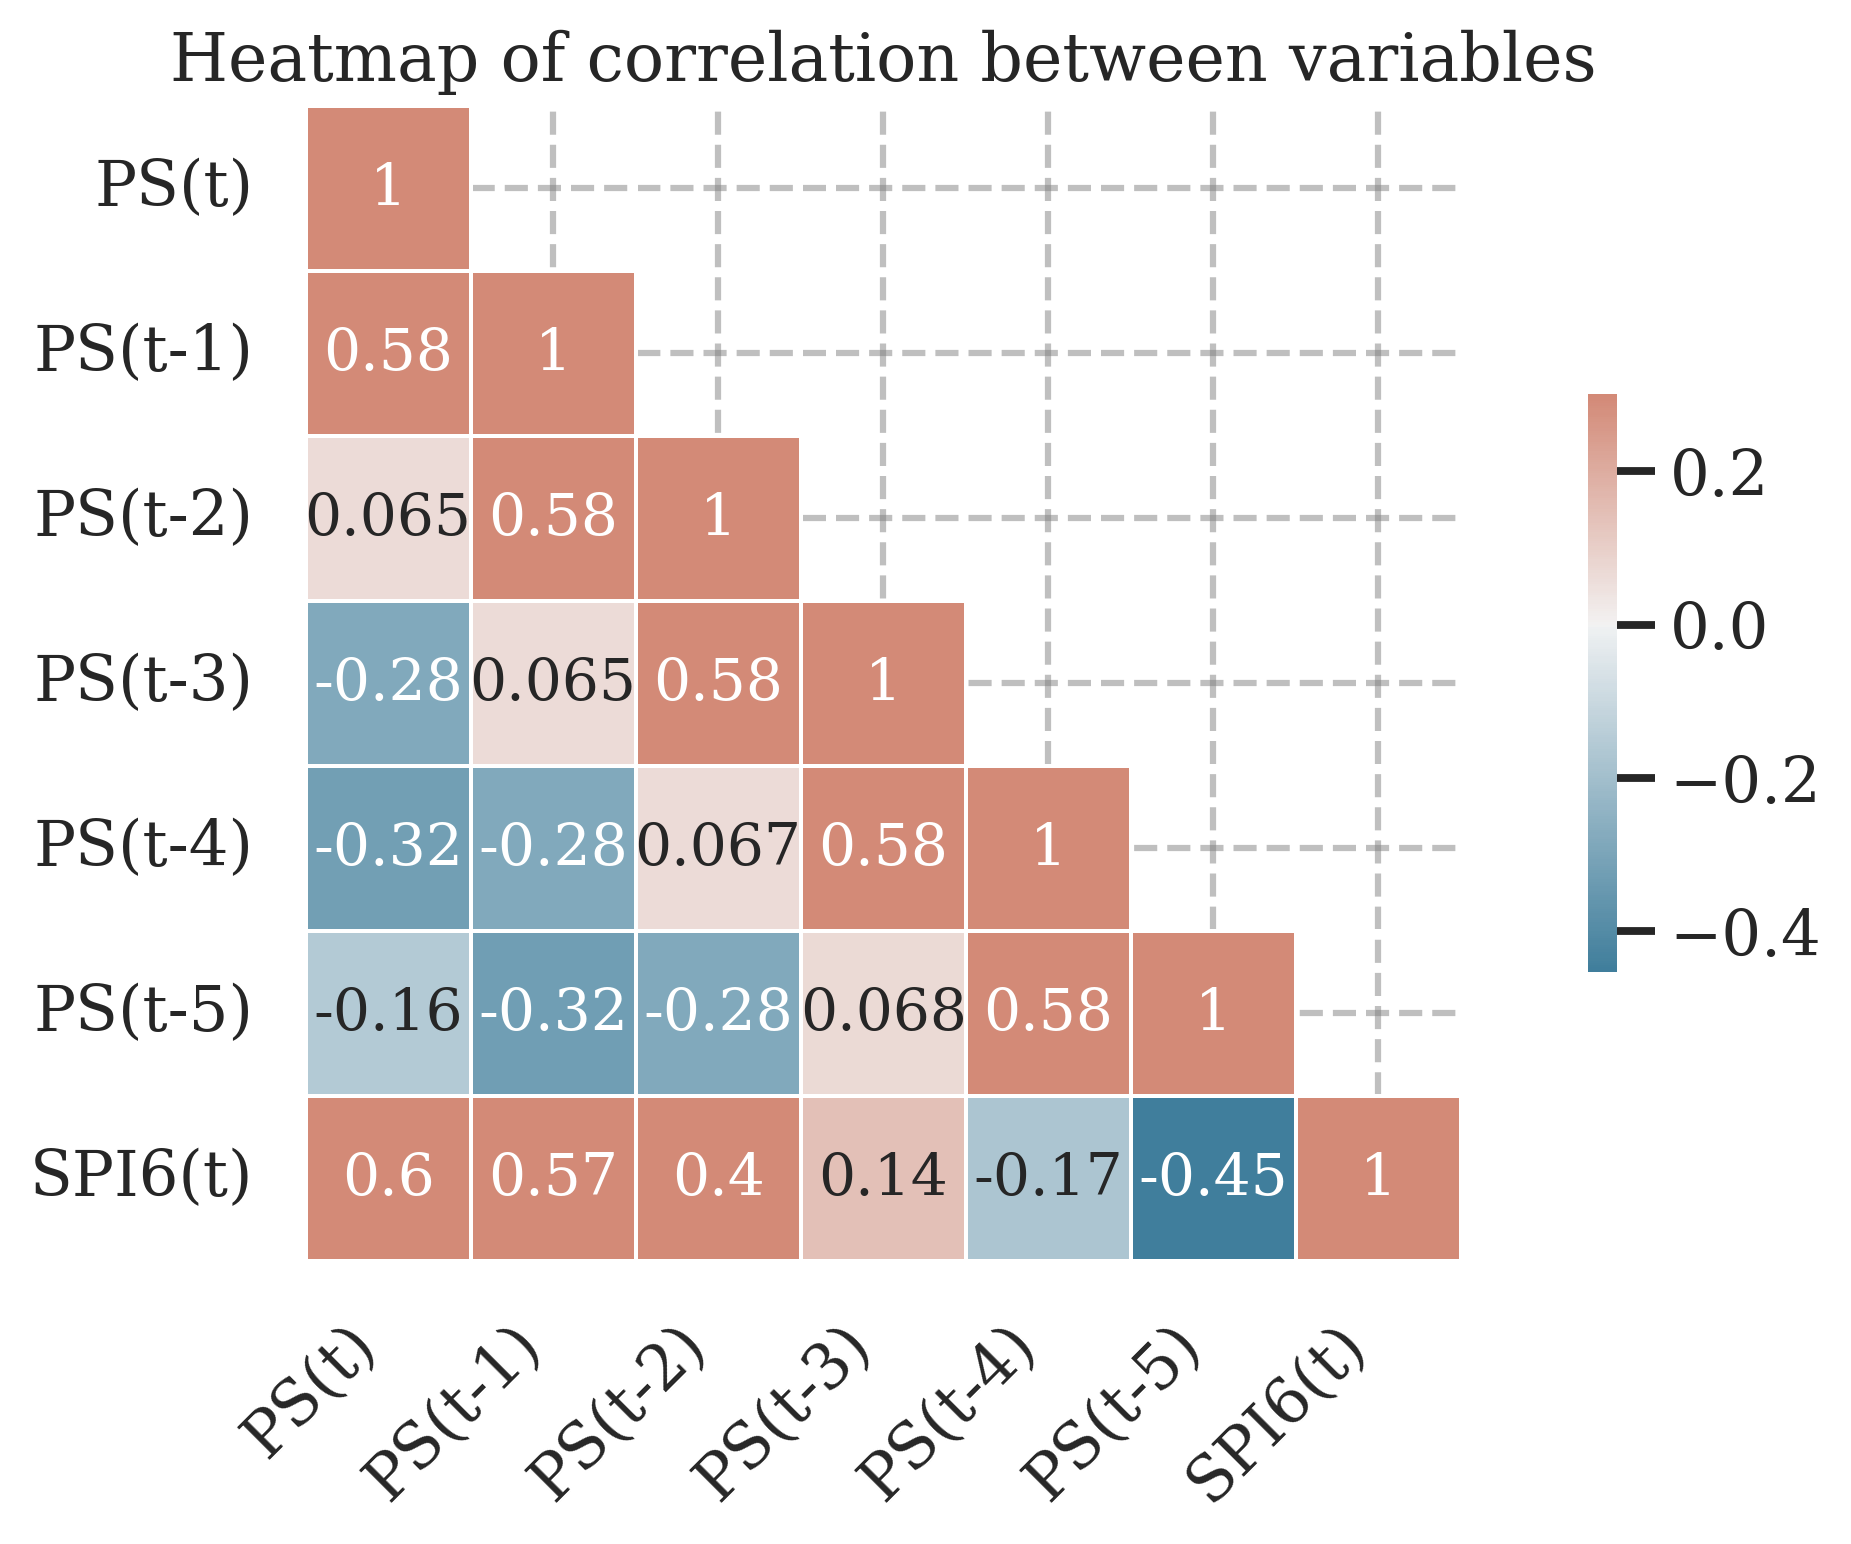

In [29]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [30]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t)      0.601126
PS(t-1)    0.570222
PS(t-5)    0.453028
PS(t-2)    0.404840
PS(t-4)    0.173770
PS(t-3)    0.141461
Name: SPI6(t), dtype: float64

#####  The lag 0 : PS(t) is the most correlated. So, we only keep it.

In [31]:
lagged_selected_columns.append('PS(t)')

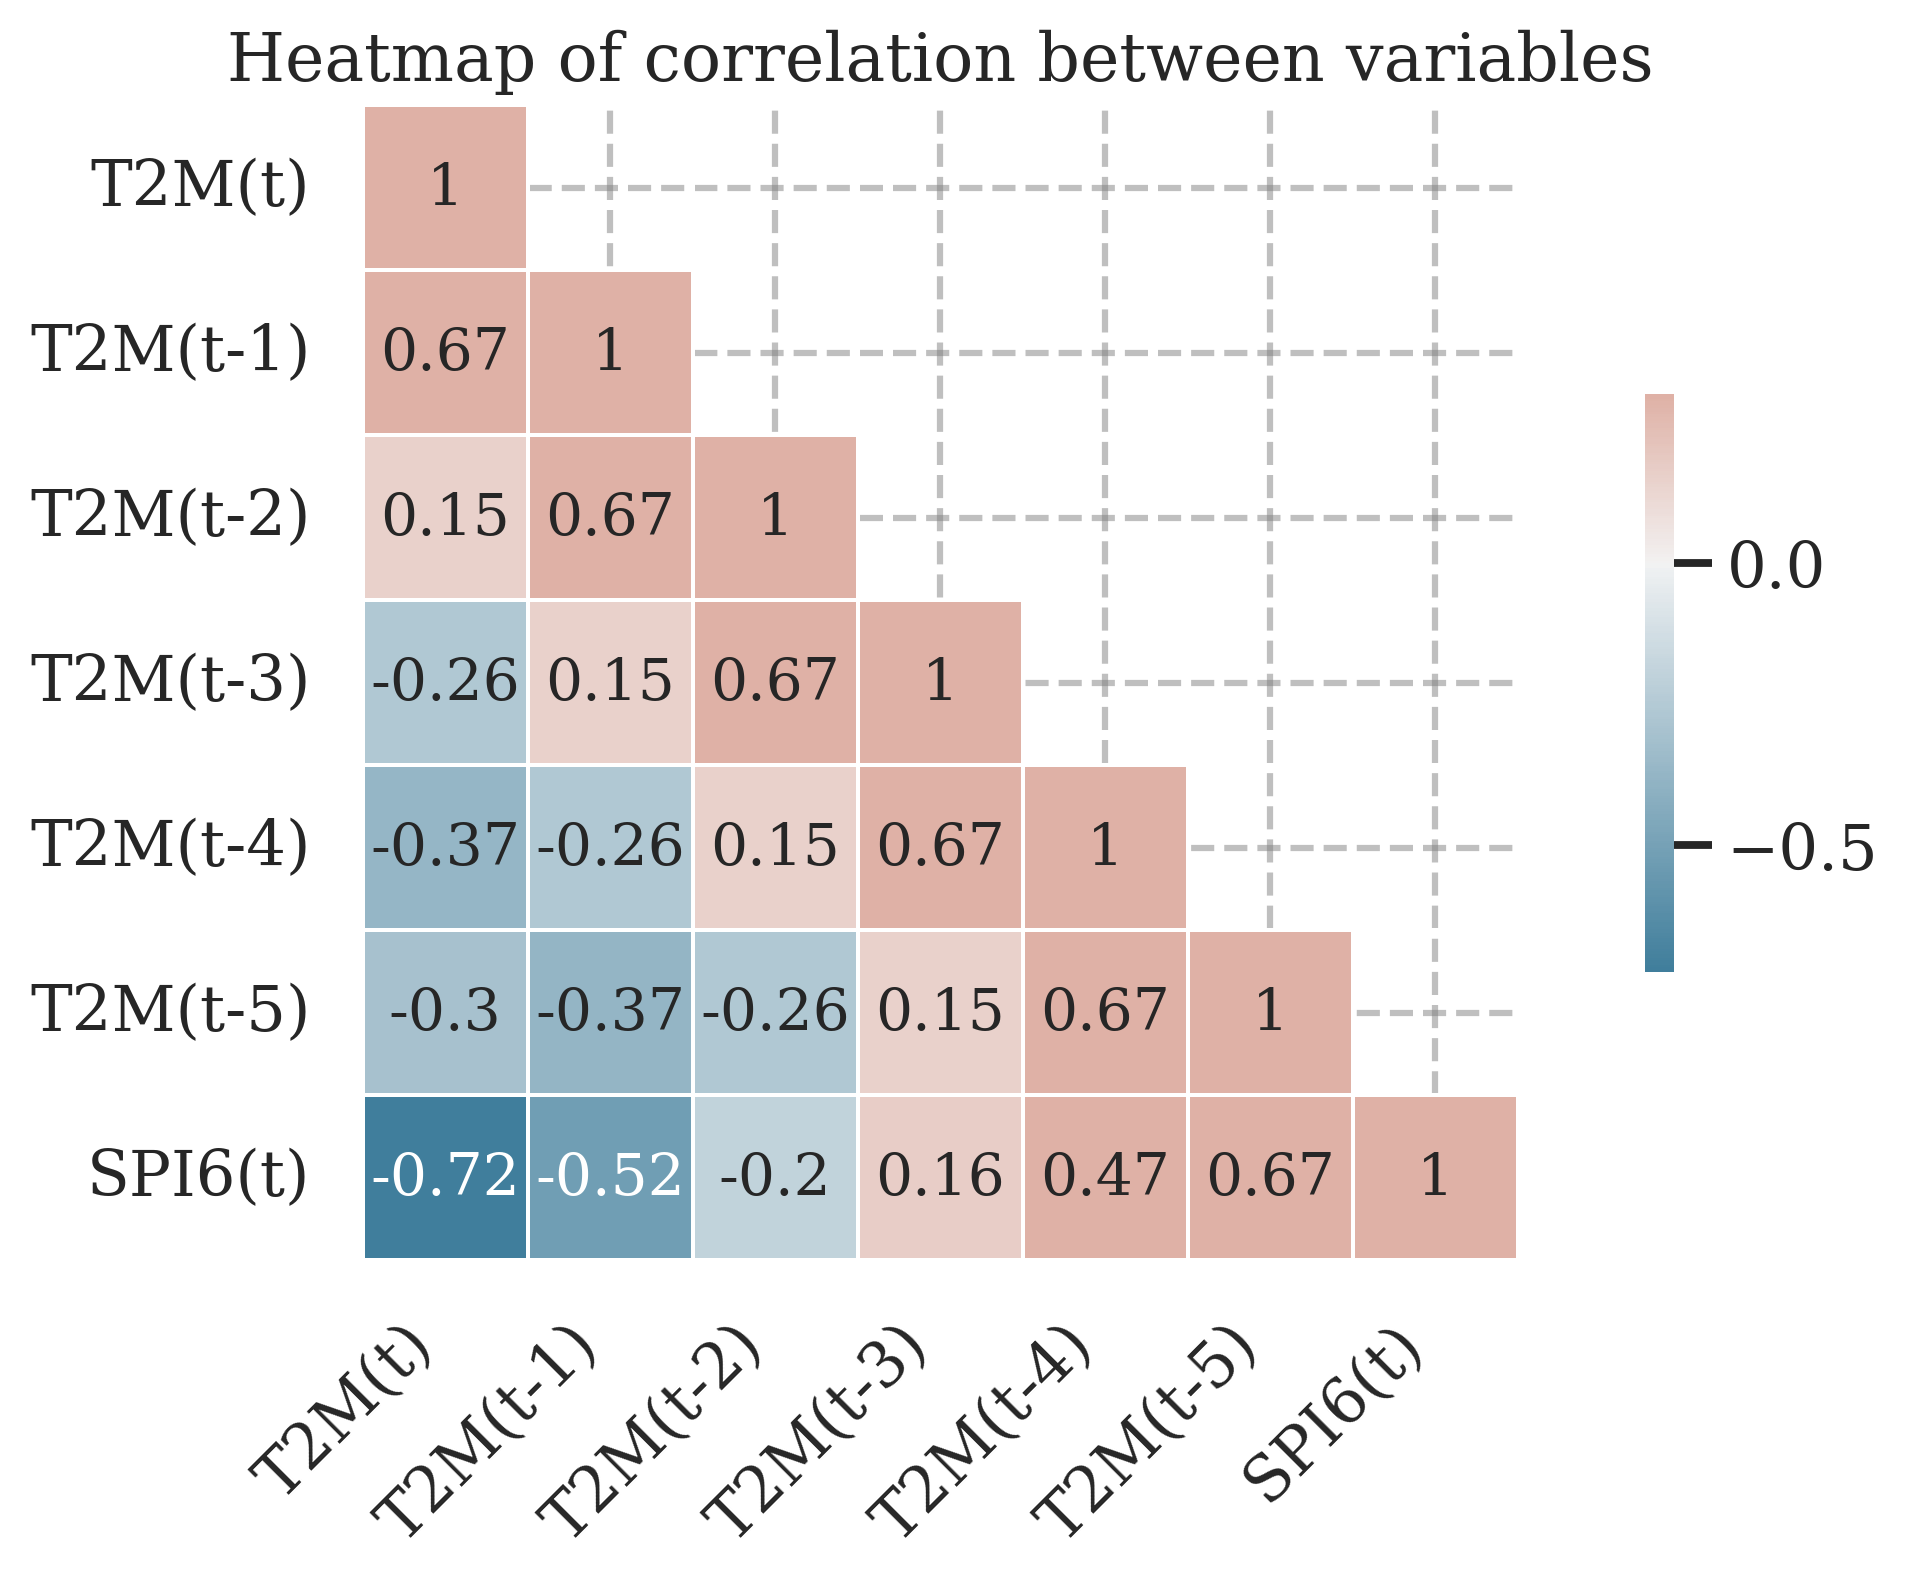

In [32]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [33]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.724816
T2M(t-5)    0.670155
T2M(t-1)    0.523037
T2M(t-4)    0.473905
T2M(t-2)    0.195058
T2M(t-3)    0.164788
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.72

In [34]:
print(lagged_selected_columns), lagged_selected_columns.append('T2M(t)')

['SPI6(t)', 'PS(t)']


(None, None)

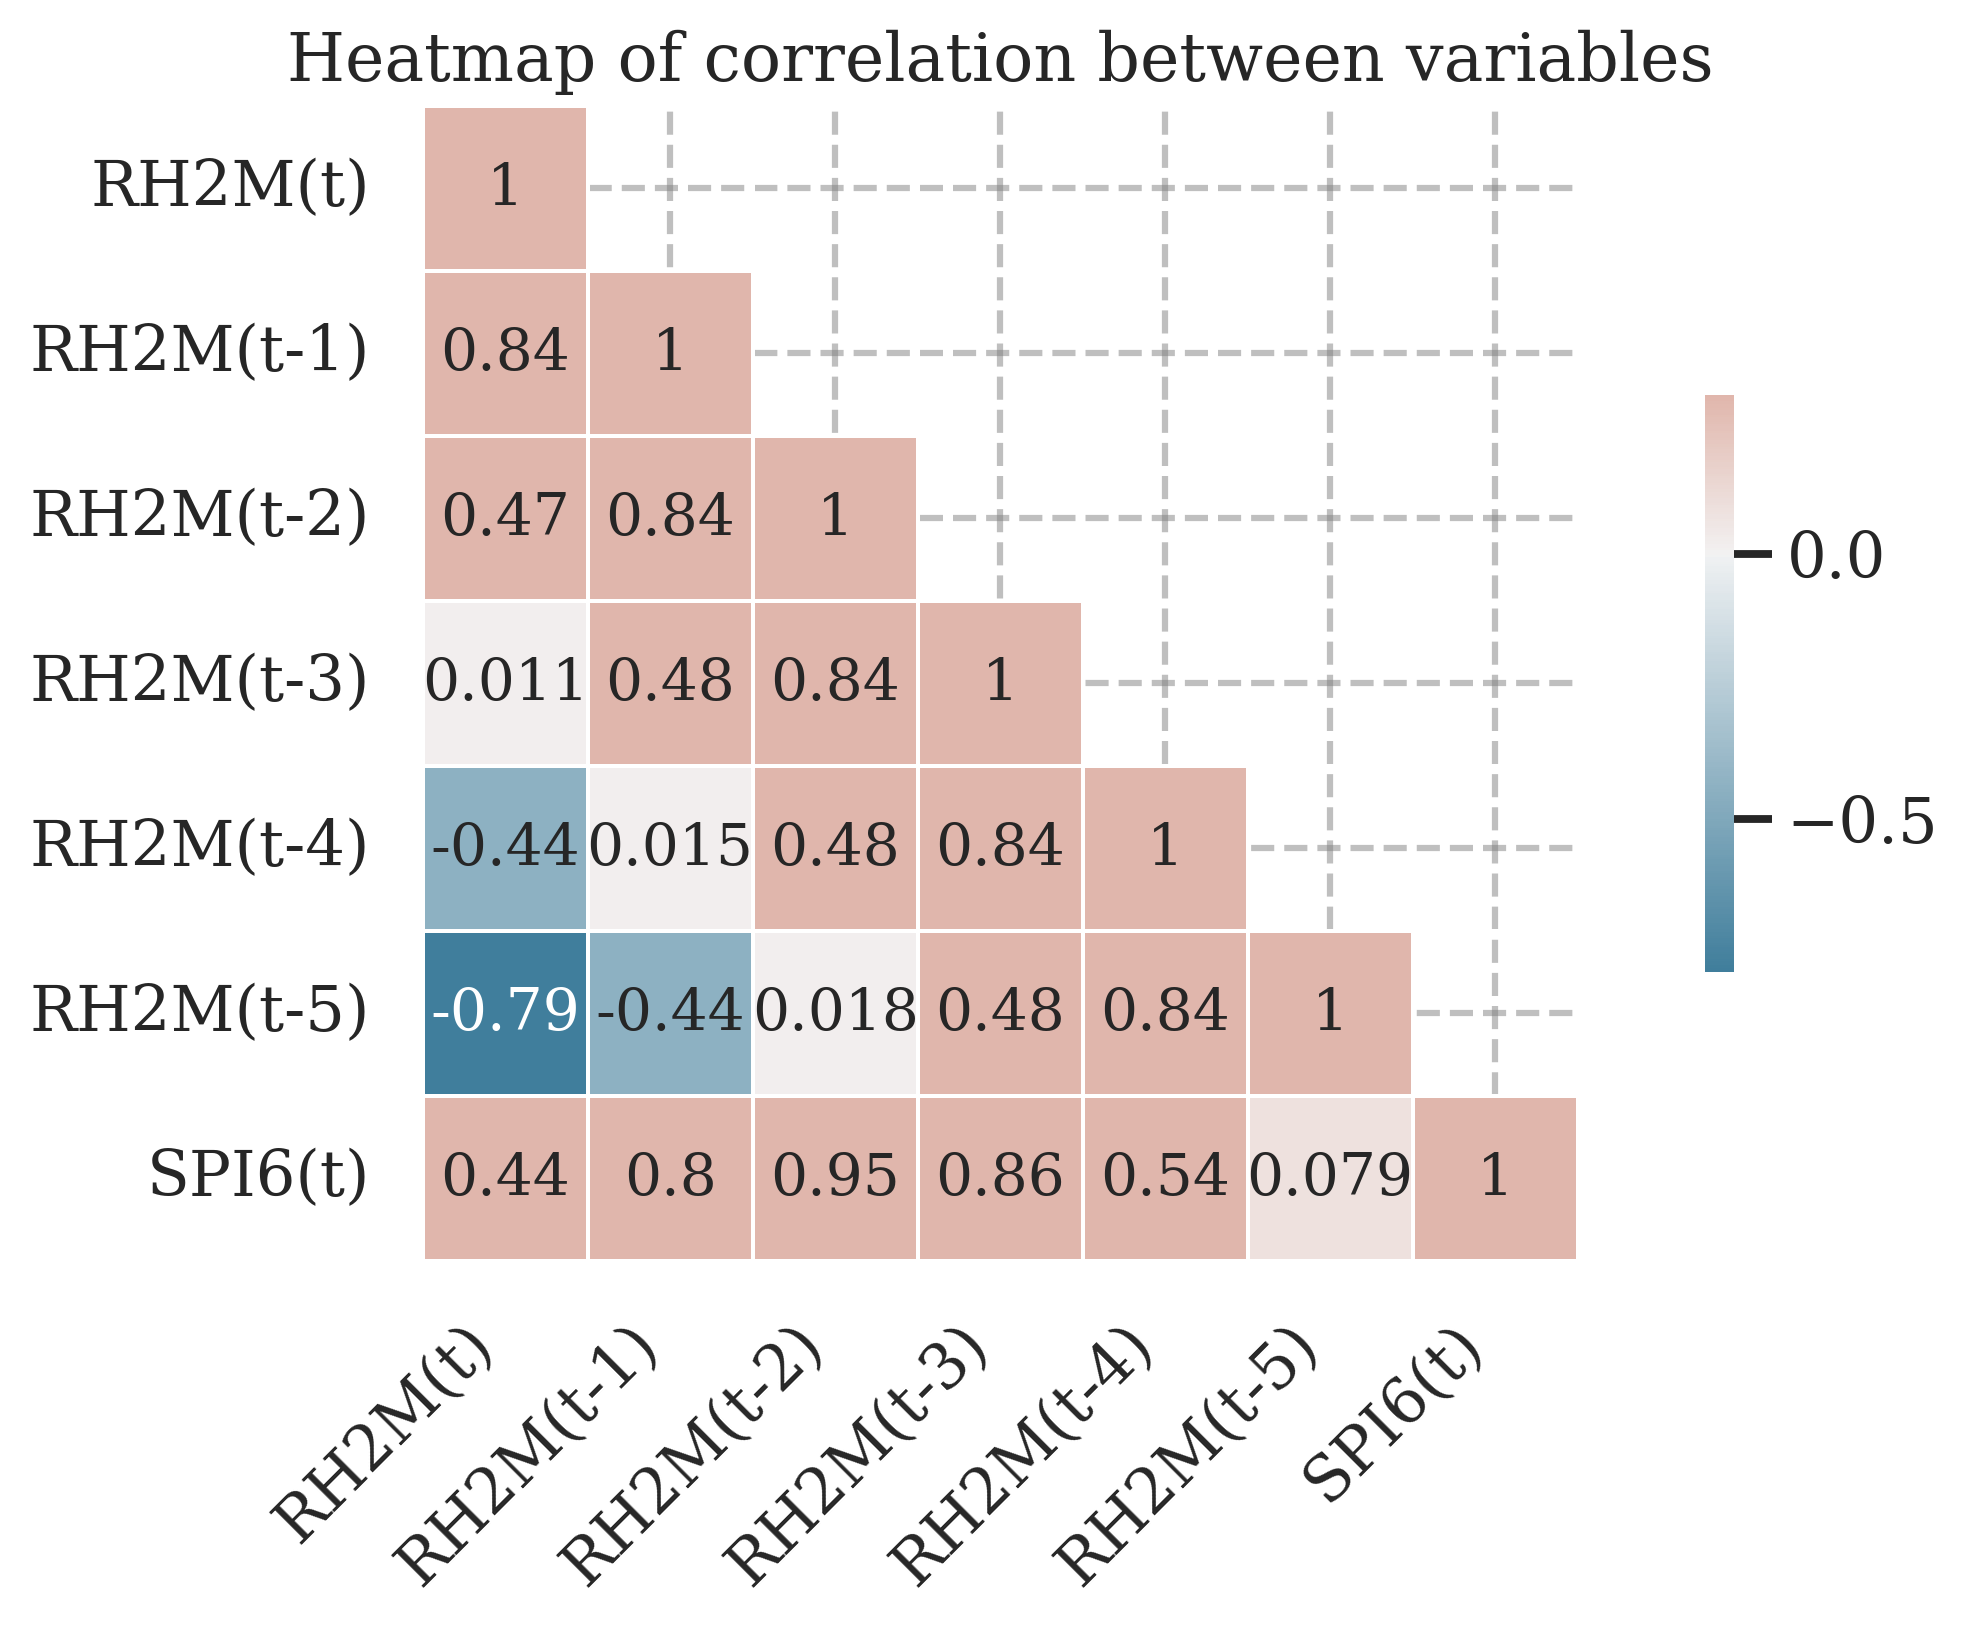

In [35]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [36]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.945212
RH2M(t-3)    0.856233
RH2M(t-1)    0.796195
RH2M(t-4)    0.543882
RH2M(t)      0.440062
RH2M(t-5)    0.079138
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.94

In [37]:
lagged_selected_columns.append('RH2M(t-2)')

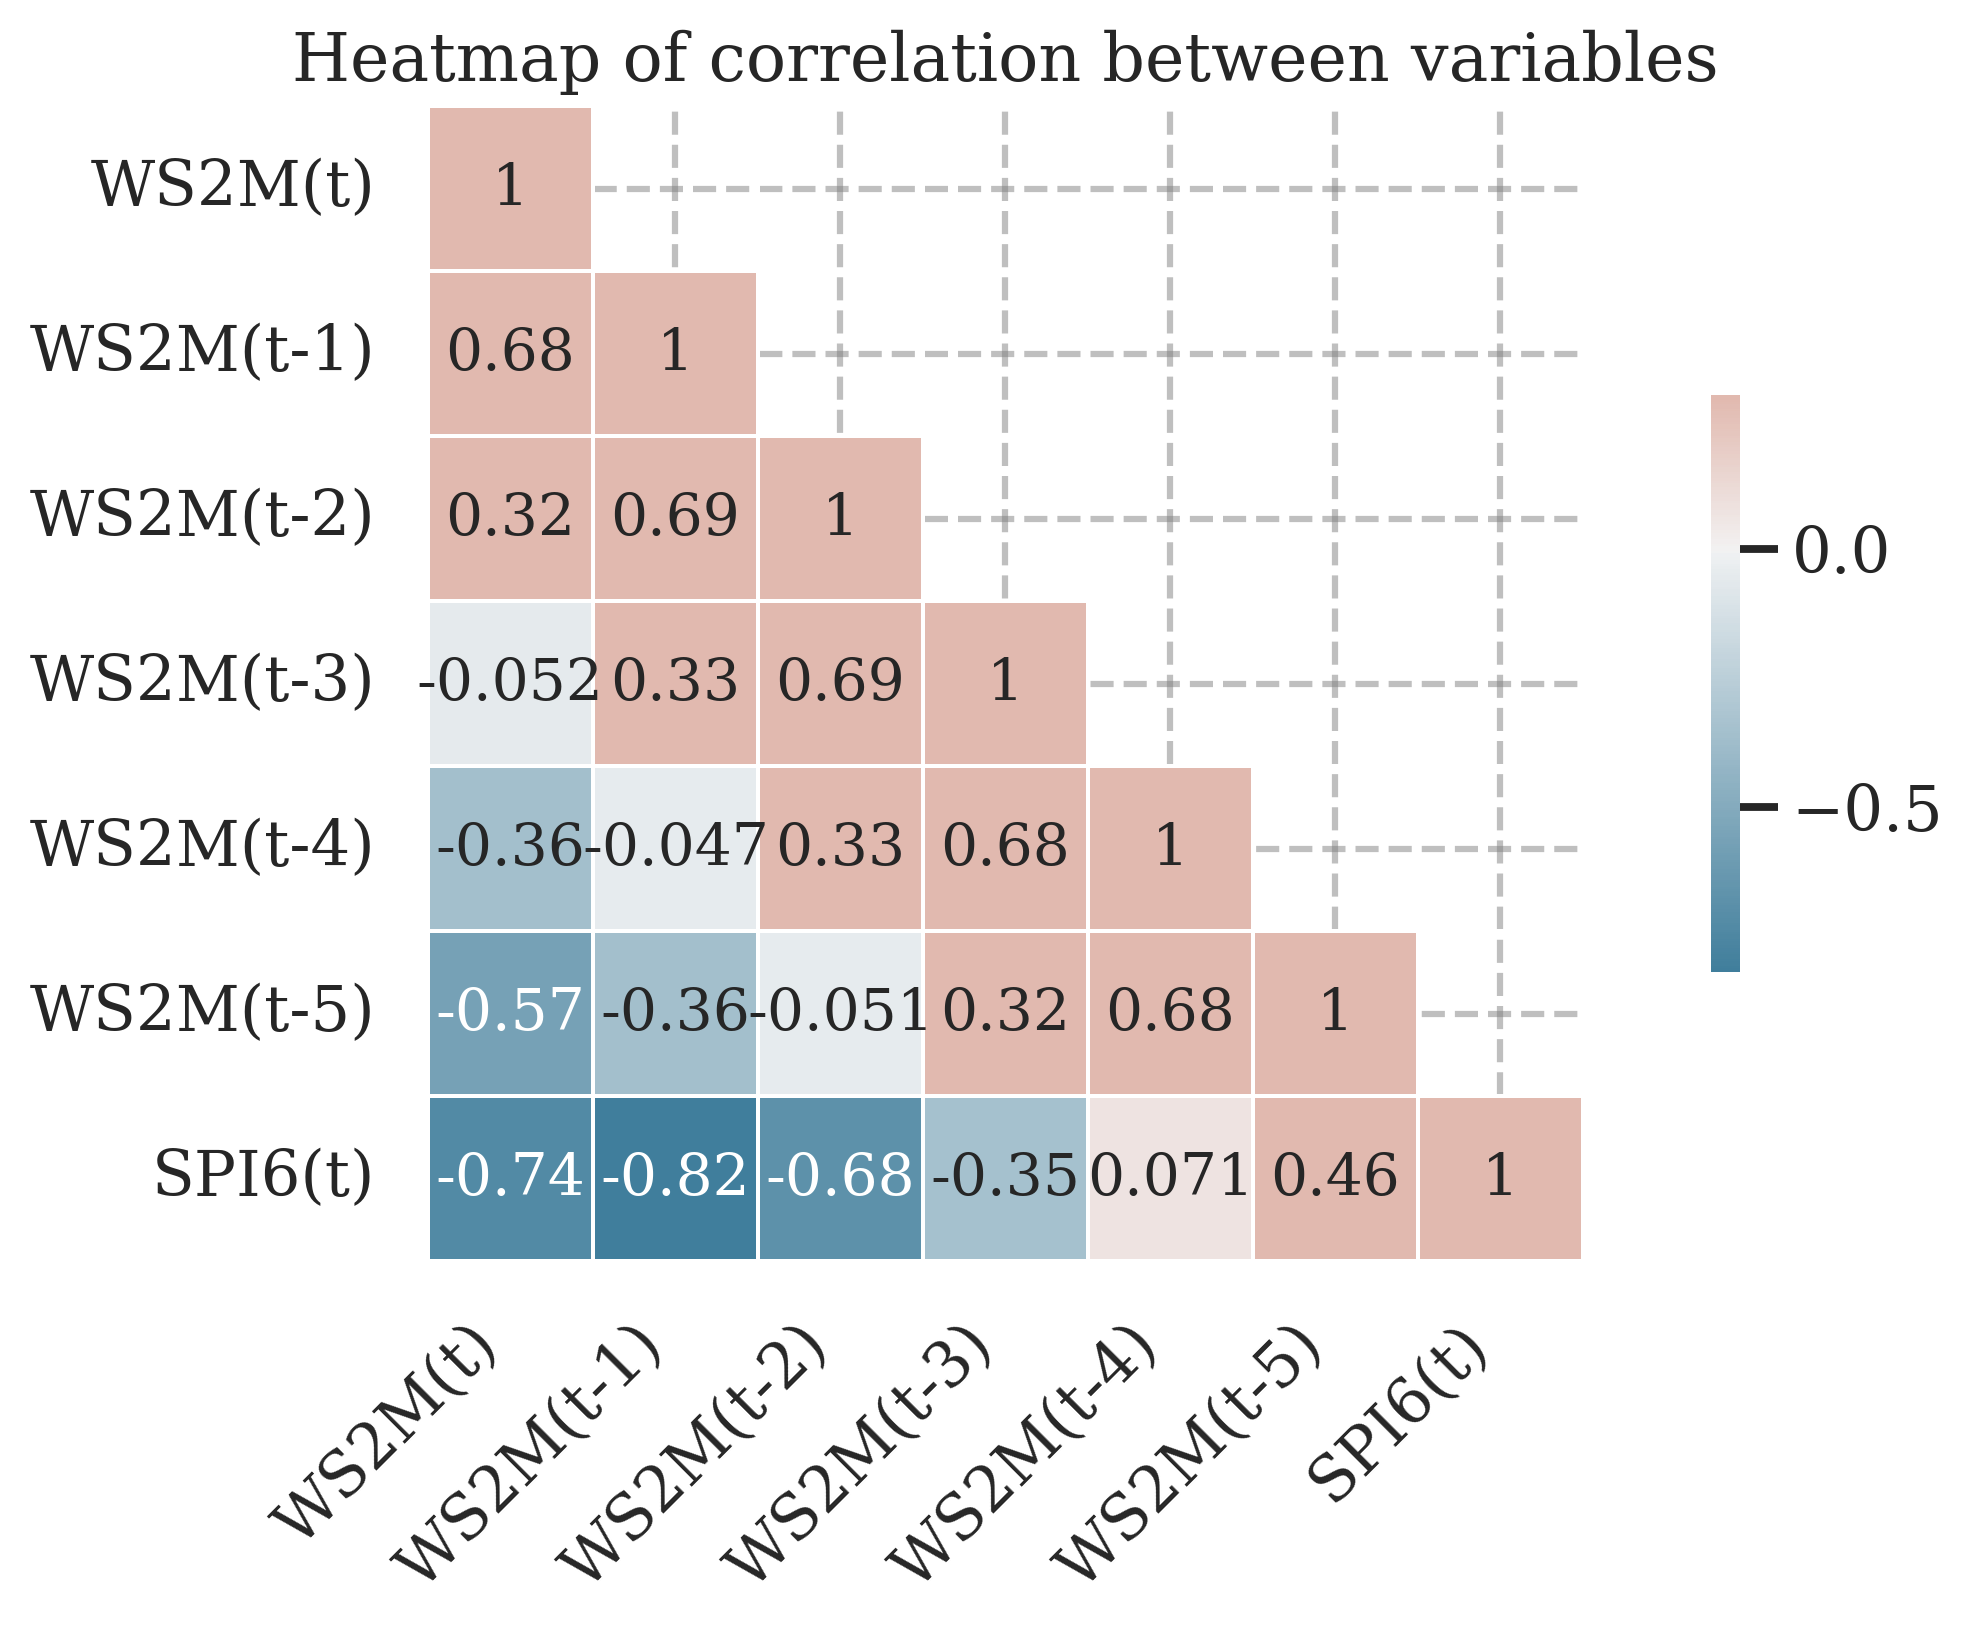

In [38]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [39]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.822050
WS2M(t)      0.738047
WS2M(t-2)    0.680696
WS2M(t-5)    0.456698
WS2M(t-3)    0.349910
WS2M(t-4)    0.070536
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.82

In [40]:
lagged_selected_columns.append('WS2M(t-1)')

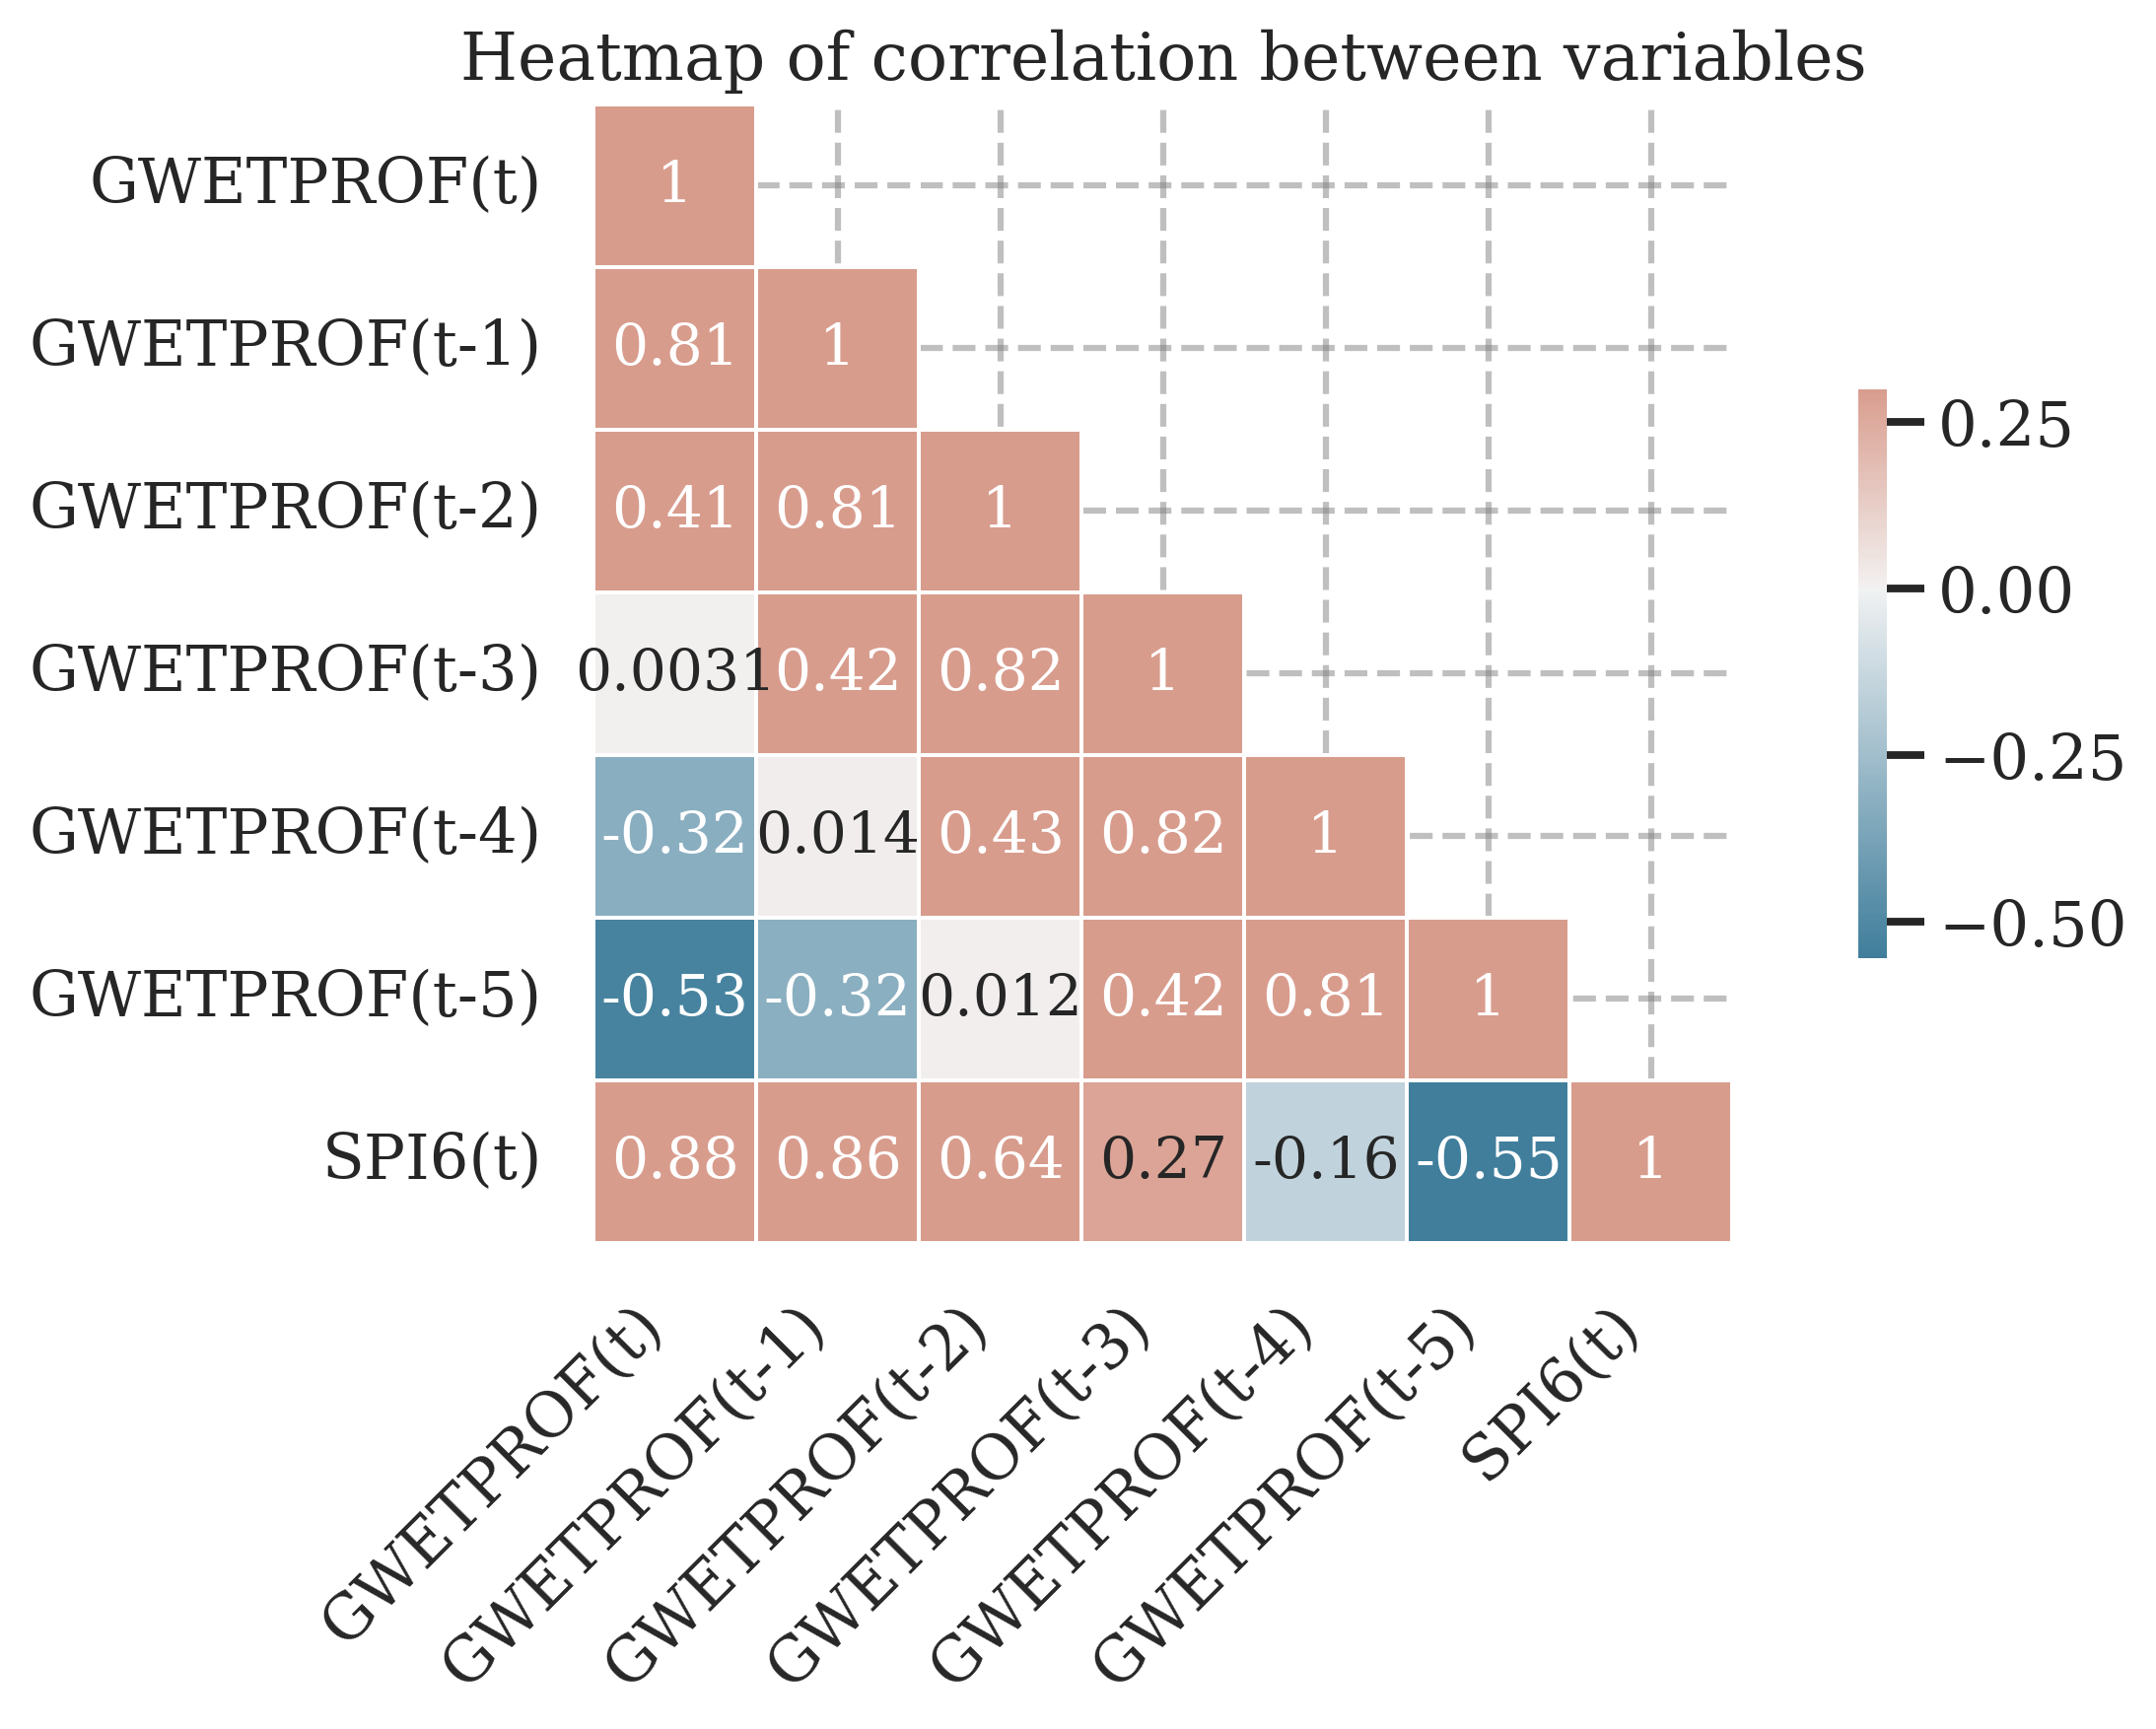

In [41]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [42]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.878137
GWETPROF(t-1)    0.858974
GWETPROF(t-2)    0.636258
GWETPROF(t-5)    0.554184
GWETPROF(t-3)    0.274547
GWETPROF(t-4)    0.156903
Name: SPI6(t), dtype: float64

le lag 0 est le plus correlé : GWETPROF(t)      0.87

In [43]:
lagged_selected_columns.append('GWETPROF(t)')

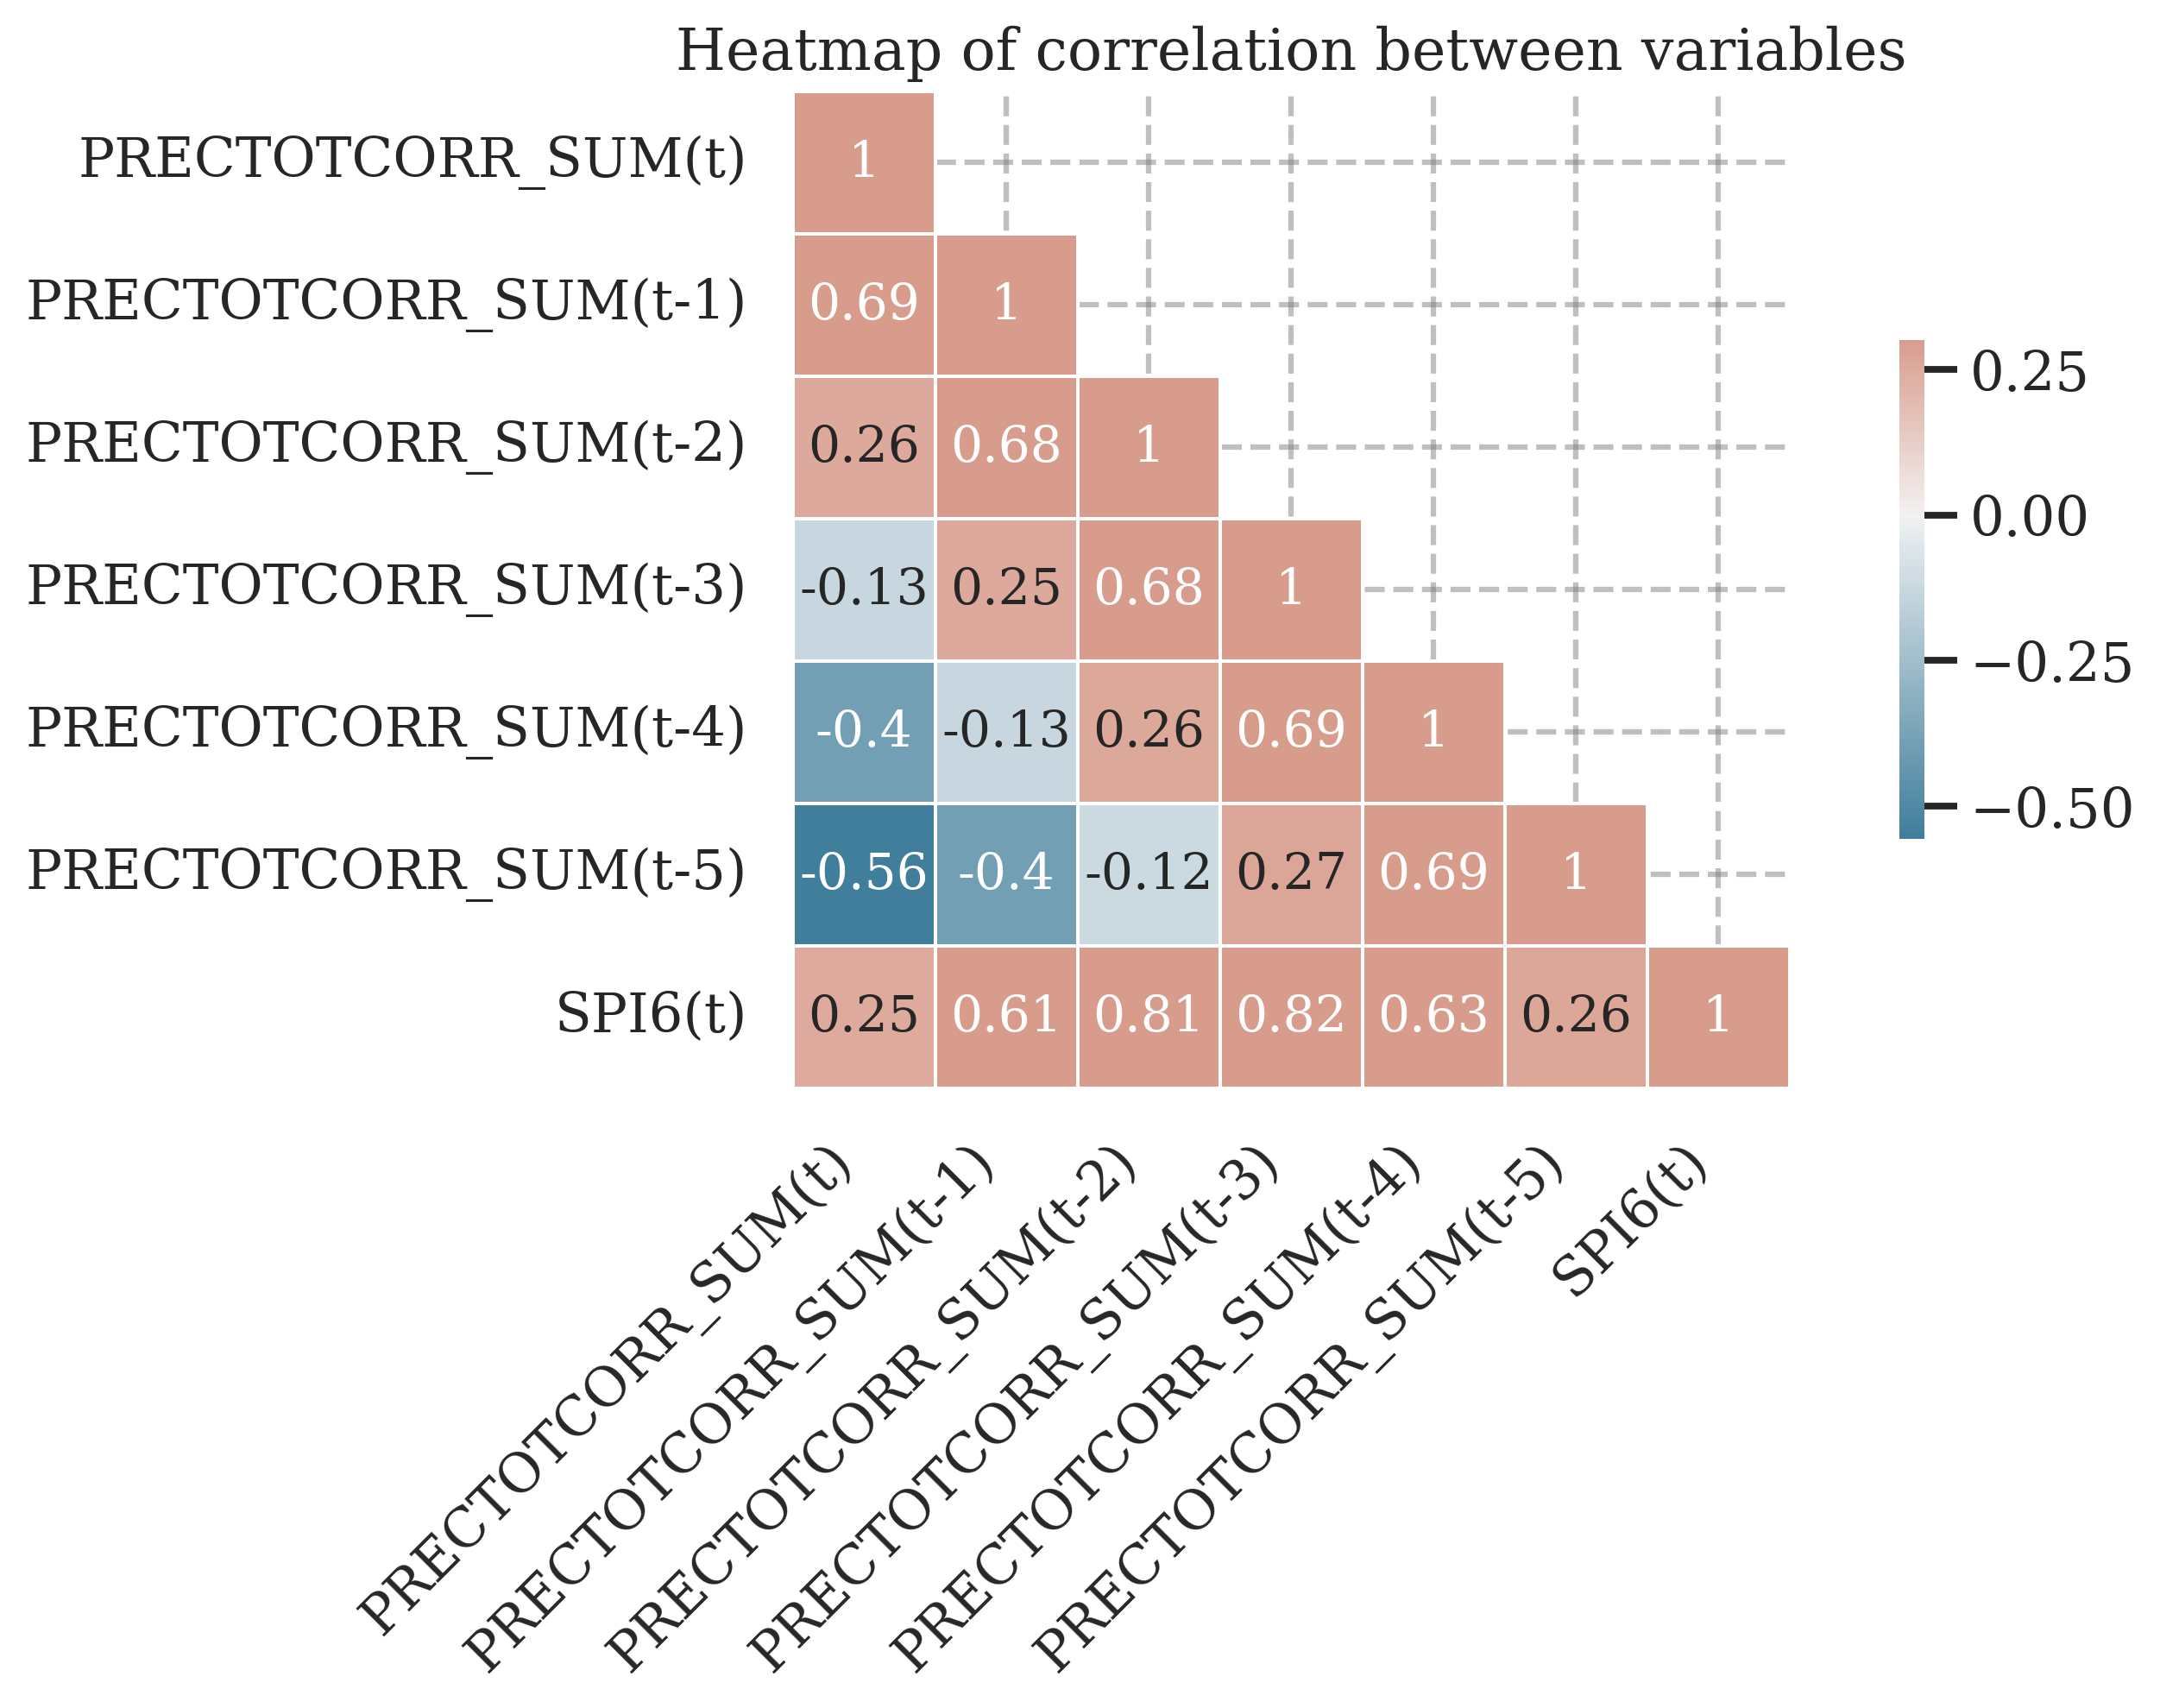

In [44]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [45]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.817841
PRECTOTCORR_SUM(t-2)    0.814821
PRECTOTCORR_SUM(t-4)    0.625746
PRECTOTCORR_SUM(t-1)    0.614617
PRECTOTCORR_SUM(t-5)    0.264246
PRECTOTCORR_SUM(t)      0.250807
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.81

In [46]:
lagged_selected_columns.append('PRECTOTCORR_SUM(t-3)')

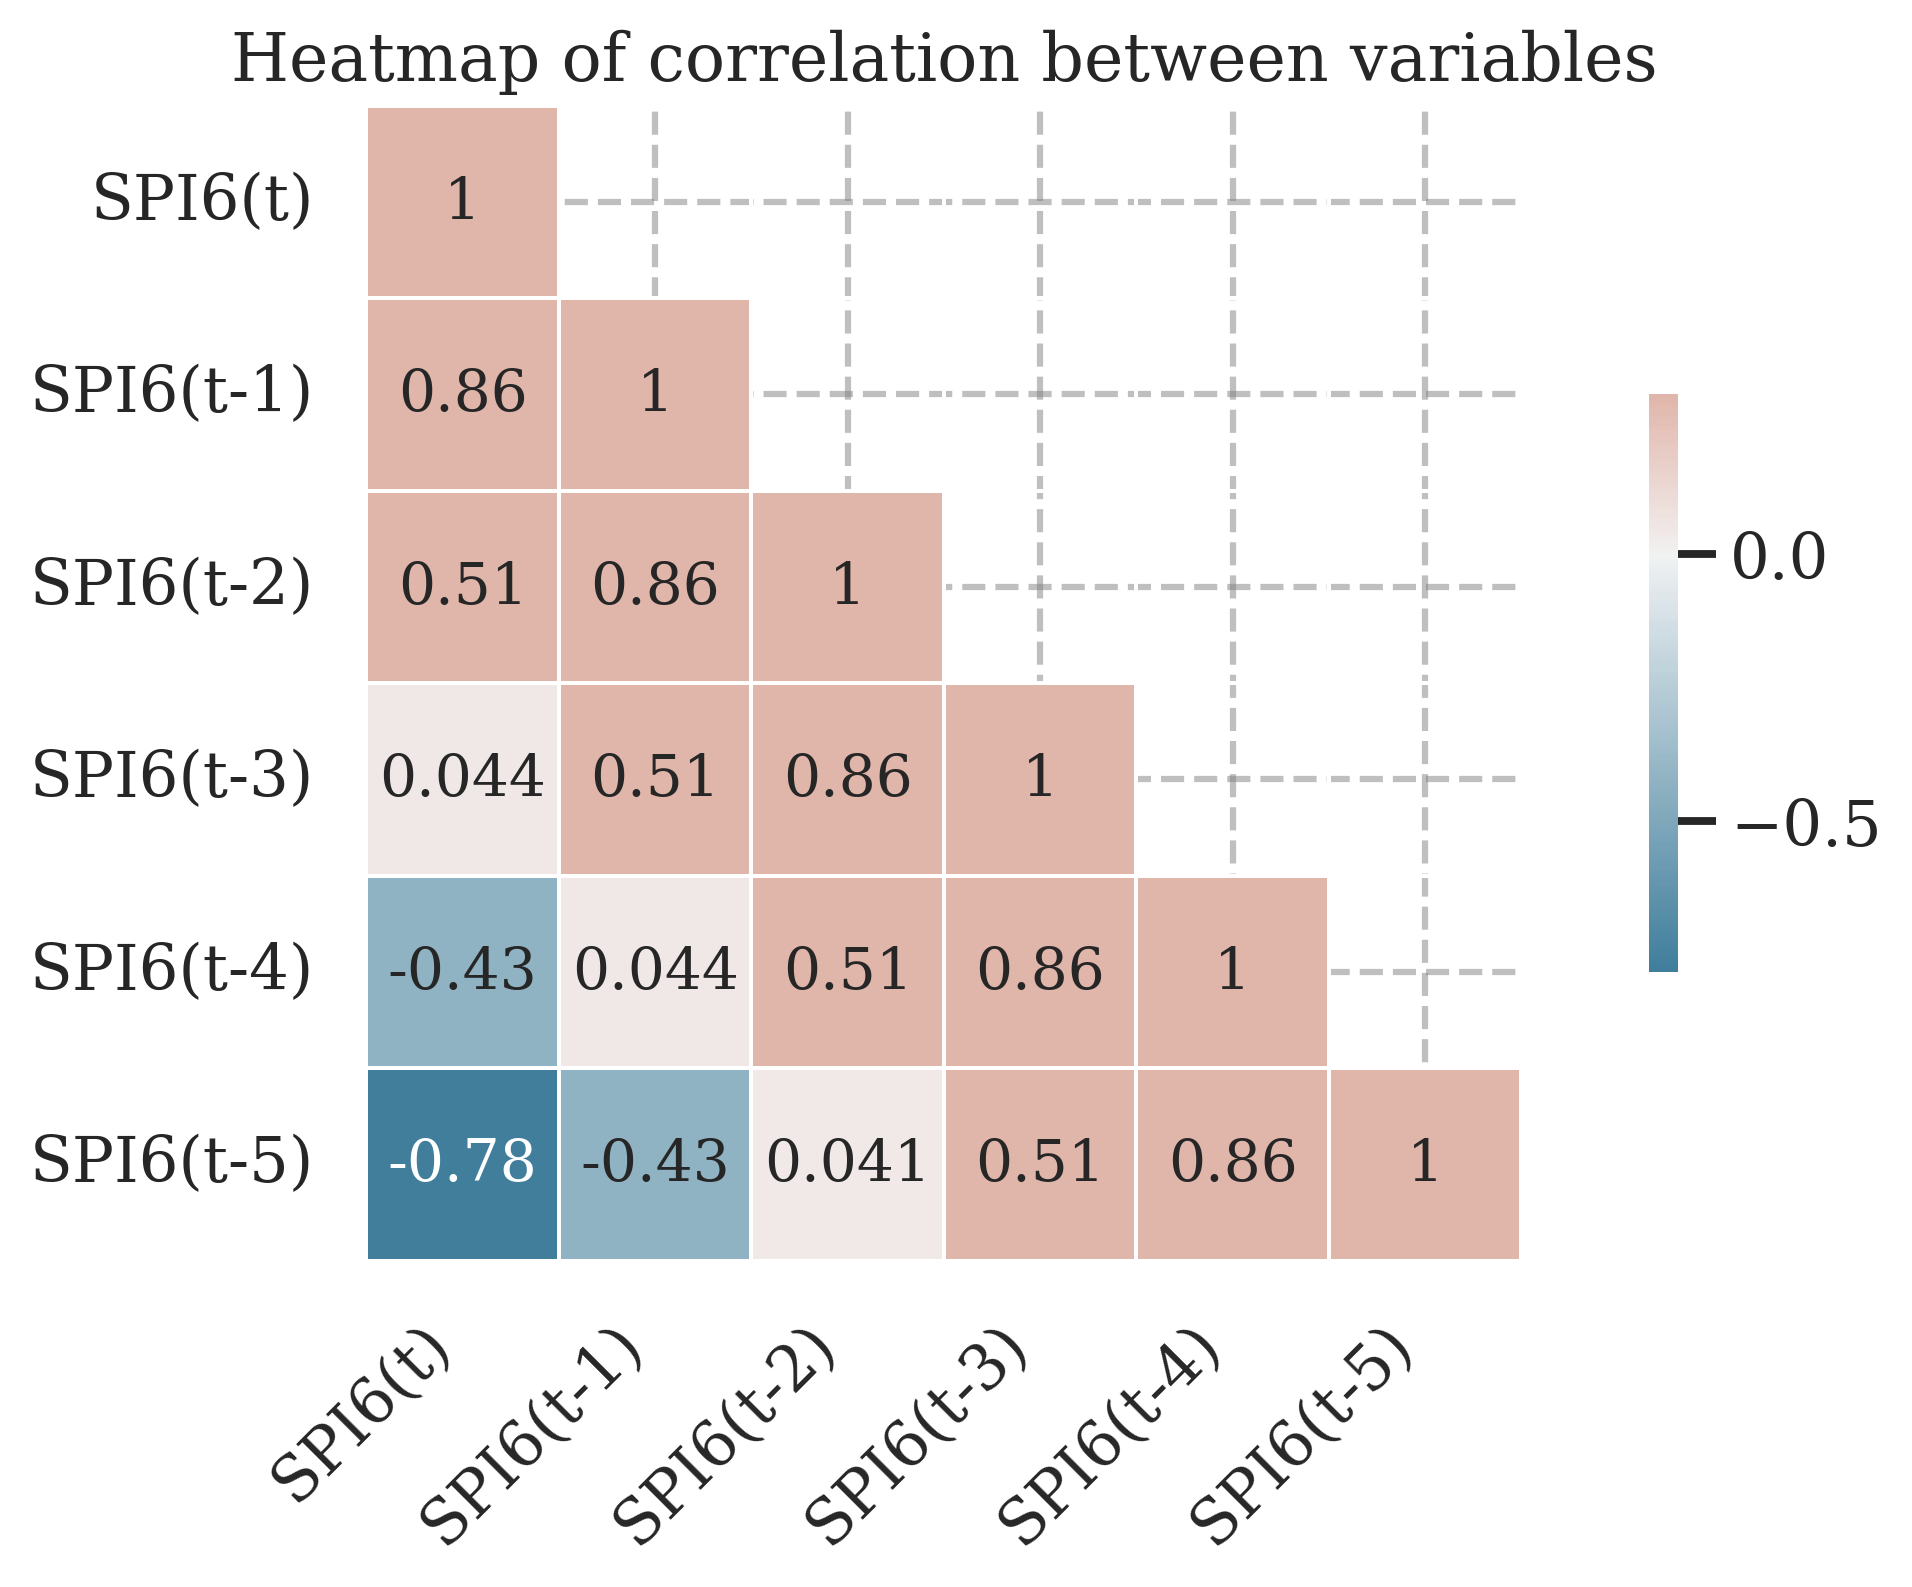

In [47]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [48]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.861434
SPI6(t-5)    0.782105
SPI6(t-2)    0.509638
SPI6(t-4)    0.425055
SPI6(t-3)    0.043536
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.86

In [49]:
lagged_selected_columns.append('SPI6(t-1)')

New dataset by choosing each  new lag

In [50]:
#lagged_selected_columns, 
len(lagged_selected_columns)

8

In [51]:
print(lagged_selected_columns)

['SPI6(t)', 'PS(t)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)']


In [52]:
final_lagged_data = lagged_data[lagged_selected_columns] 

final_lagged_data

,SPI6(t),PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1)
DATE,,,,,,,,
1981-11-30,1.748372,0.204301,-0.604151,0.942556,-0.845494,0.185185,0.377021,2.018939
1981-12-31,1.013999,0.204301,-0.630838,0.678923,-0.390558,-0.259259,0.245897,1.748372
1982-01-31,0.125011,0.096774,-0.570052,0.106702,-0.381974,-0.481481,-1.000000,1.013999
1982-02-28,-0.647989,-0.139785,-0.230541,-0.231580,0.021459,-0.629630,-1.000000,0.125011
1982-03-31,-1.363049,-0.376344,0.303188,-0.536839,-0.055794,-0.777778,-1.000000,-0.647989
...,...,...,...,...,...,...,...,...
2021-08-31,0.591896,0.311828,-0.286879,0.429166,-0.107296,-0.185185,-0.876212,-0.381344
2021-09-30,1.197748,0.268817,-0.226093,0.658110,-0.742489,0.333333,-0.416128,0.591896
2021-10-31,1.283649,0.010753,0.009637,0.963369,-0.914163,0.185185,-0.008891,1.197748


### Create lags with raw data to prevent data leakage

In [53]:
lagged_data_raw = create_lagged_features(data= data, 
                                      col_names=data.columns,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data_raw.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,98.36,28.59,69.31,217.62,2.47,0.49,200.39,-0.280820,98.41,25.82,...,0.00,2.018939,98.38,23.73,53.69,82.56,1.97,0.59,0.00,1.748372
1981-12-31,98.41,25.82,81.75,228.56,2.12,0.58,242.58,0.608168,98.40,25.65,...,0.00,1.748372,98.38,23.55,41.50,77.19,1.98,0.53,0.00,1.013999
1982-01-31,98.40,25.65,82.94,227.88,1.66,0.61,221.48,1.419830,98.42,25.45,...,0.00,1.013999,98.33,23.96,30.50,44.00,2.45,0.50,0.00,0.125011
1982-02-28,98.42,25.45,83.81,222.56,1.53,0.70,200.39,2.134890,98.29,26.55,...,0.00,0.125011,98.22,26.25,33.50,69.88,2.36,0.48,10.55,-0.647989
1982-03-31,98.29,26.55,74.31,200.56,1.44,0.66,0.00,2.018939,98.38,23.73,...,10.55,-0.647989,98.11,29.85,34.31,91.12,2.59,0.46,5.27,-1.363049


In [54]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged_raw.csv'
lagged_data_raw[final_lagged_data.columns].to_csv(lagged_data_path)

In [55]:
pd.read_csv('../datasets/lagged/Malanville_lagged_raw.csv')

,DATE,SPI6(t),PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1)
0,1981-11-30,1.748372,98.38,23.73,83.81,1.44,0.59,221.48,2.018939
1,1981-12-31,1.013999,98.38,23.55,74.31,1.97,0.53,200.39,1.748372
2,1982-01-31,0.125011,98.33,23.96,53.69,1.98,0.50,0.00,1.013999
3,1982-02-28,-0.647989,98.22,26.25,41.50,2.45,0.48,0.00,0.125011
4,1982-03-31,-1.363049,98.11,29.85,30.50,2.36,0.46,0.00,-0.647989
...,...,...,...,...,...,...,...,...,...
477,2021-08-31,0.591896,98.43,25.87,65.31,2.30,0.54,19.91,-0.381344
478,2021-09-30,1.197748,98.41,26.28,73.56,1.56,0.61,93.91,0.591896
479,2021-10-31,1.283649,98.29,27.87,84.56,1.36,0.59,159.41,1.197748
480,2021-11-30,1.211344,98.26,27.64,82.69,1.38,0.53,265.57,1.283649


In [56]:
pd.read_csv('../datasets/lagged/Malanville_lagged_raw.csv').describe()

,SPI6(t),PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,-0.012243,98.284149,27.793071,52.520747,2.206515,0.492469,64.380809,-0.009853
std,0.993565,0.151803,2.744112,22.281916,0.506662,0.051991,80.173109,0.997063
min,-1.421025,97.820000,21.060000,13.810000,1.260000,0.430000,0.000000,-1.421025
25%,-0.976531,98.180000,25.995000,31.702500,1.782500,0.450000,0.000000,-0.976531
50%,-0.010236,98.320000,27.100000,53.030000,2.235000,0.480000,21.090000,-0.010236
75%,0.859421,98.390000,29.710000,74.295000,2.580000,0.520000,121.290000,0.859421
max,2.096264,98.750000,34.550000,85.880000,3.590000,0.660000,321.680000,2.096264
